<a href="https://colab.research.google.com/github/Prashanth0421/07012025/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("/content/new_customer_purchase_dataset.csv")
df.head()


,CustomerID,Age,Gender,Income,SpendingScore,Purchase
0,1,22,Male,25000,39,NO
1,2,25,Female,30000,81,YES
2,3,47,Male,52000,6,NO
3,4,52,Female,60000,77,YES
4,5,46,Female,48000,40,NO


In [3]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [9]:
df.head(4)

,CustomerID,Age,Gender,Income,SpendingScore,Purchase
0,1,22,1,25000,39,0
1,2,25,0,30000,81,1
2,3,47,1,52000,6,0
3,4,52,0,60000,77,1


In [5]:
df['Purchase'] = df['Purchase'].map({'YES': 1, 'NO': 0})


In [6]:
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Income,0
SpendingScore,0
Purchase,0


In [8]:
df.head(4)

,CustomerID,Age,Gender,Income,SpendingScore,Purchase
0,1,22,1,25000,39,0
1,2,25,0,30000,81,1
2,3,47,1,52000,6,0
3,4,52,0,60000,77,1


In [10]:
df.describe()


,CustomerID,Age,Gender,Income,SpendingScore,Purchase
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,36.750000,0.500000,44300.000000,54.200000,0.550000
std,5.91608,10.572432,0.512989,13833.978002,30.214322,0.510418
min,1.00000,22.000000,0.000000,25000.000000,6.000000,0.000000
25%,5.75000,27.500000,0.000000,31500.000000,27.500000,0.000000
50%,10.50000,36.000000,0.500000,43500.000000,61.000000,1.000000
75%,15.25000,46.250000,1.000000,56750.000000,79.500000,1.000000
max,20.00000,54.000000,1.000000,68000.000000,94.000000,1.000000


In [11]:
df.fillna(df.mean(numeric_only=True), inplace=True)


PART B: Data Visualization


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


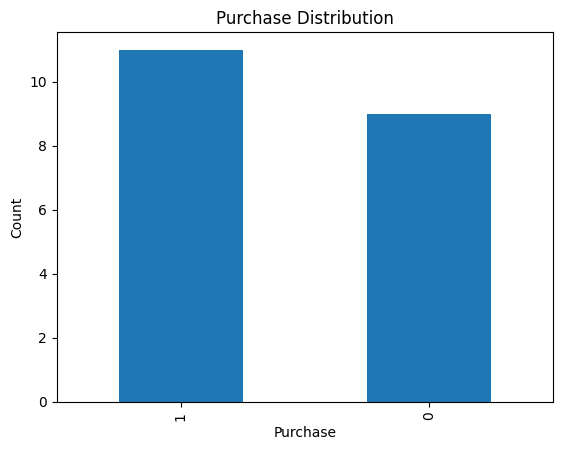

In [13]:
df['Purchase'].value_counts().plot(kind='bar')
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.title("Purchase Distribution")
plt.show()


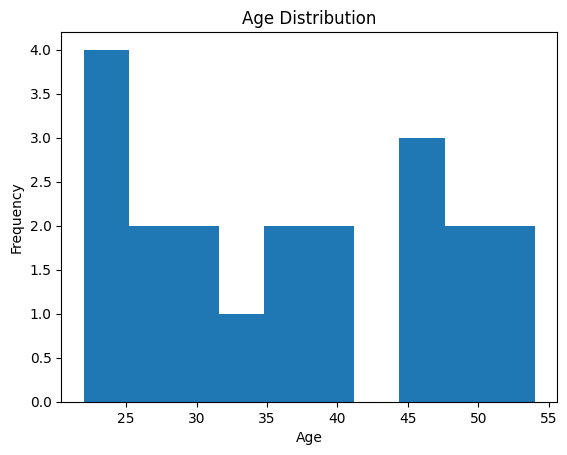

In [14]:
plt.hist(df['Age'], bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


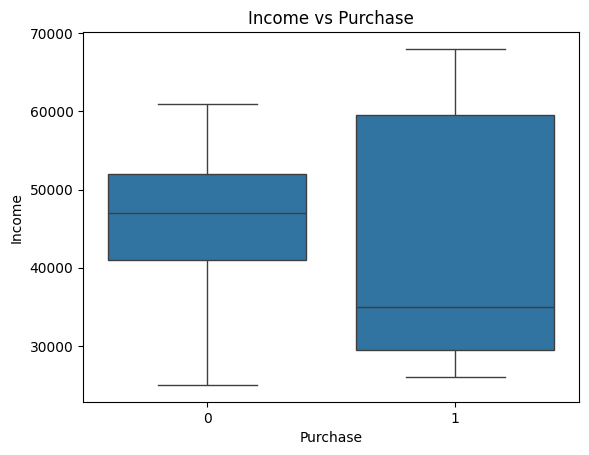

In [15]:
sns.boxplot(x='Purchase', y='Income', data=df)
plt.title("Income vs Purchase")
plt.show()


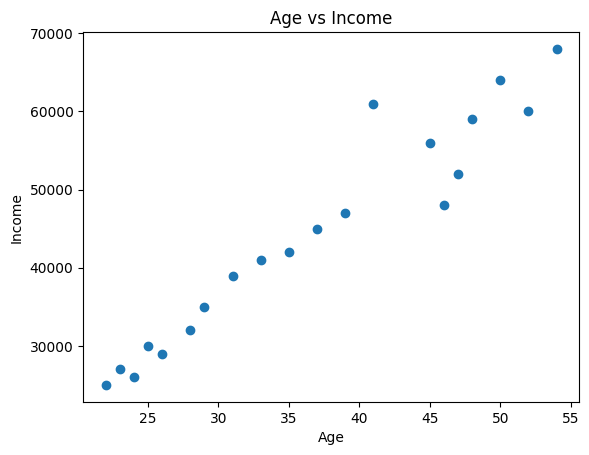

In [16]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()


PART C: Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.75
[[1 1]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



PART D: Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
y_pred_dt = dt.predict(X_test)

confusion_matrix(y_test, y_pred_dt)


array([[2, 0],
       [0, 2]])

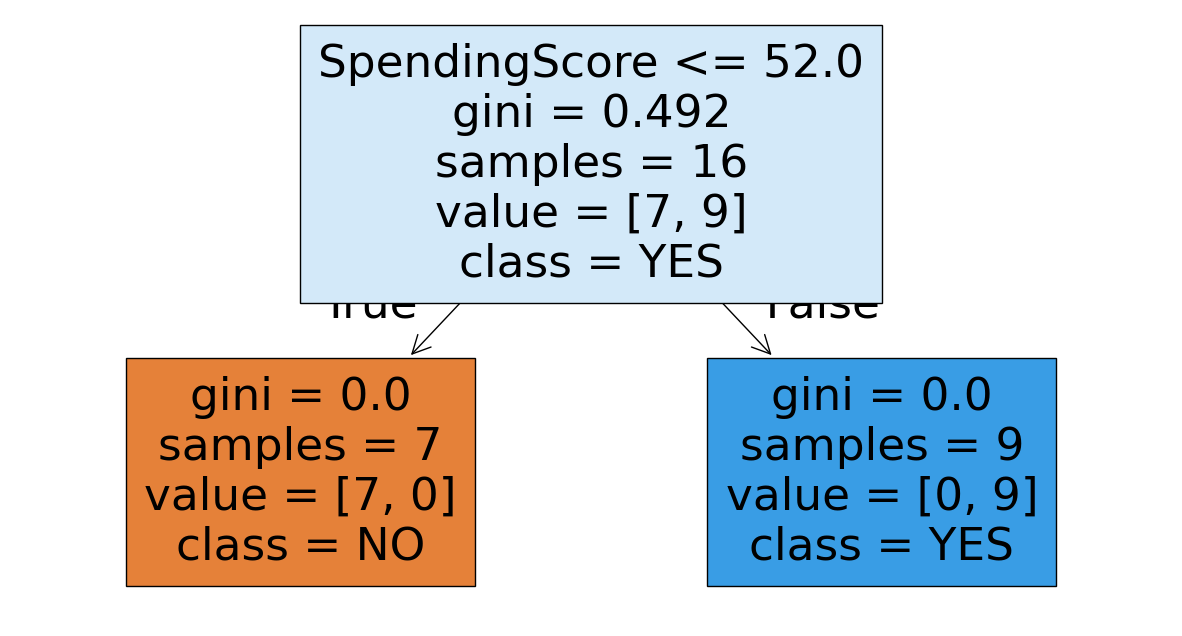

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns, class_names=['NO','YES'], filled=True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


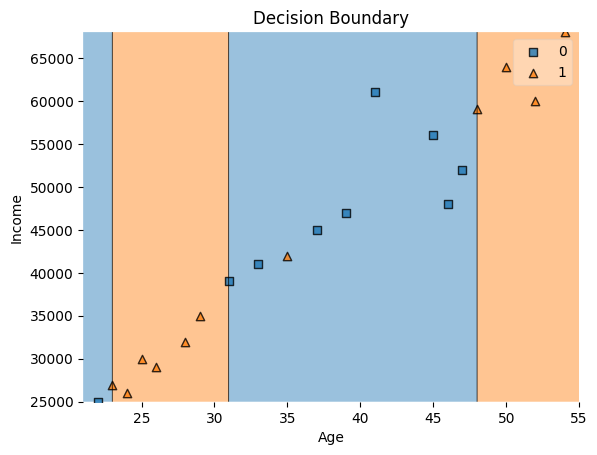

In [23]:
X2 = df[['Age', 'Income']]
y2 = df['Purchase']

dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X2, y2)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X2.values, y2.values, clf=dt2)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Decision Boundary")
plt.show()
